In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

<h1><center>Resampling Methods</center></h1>

<b>Resampling methods</b> involve repeatedly drawing samples from training data and refitting a model on them. Resampling approaches can be computationally expensive. <b>Cross-validation</b> and <b>bootstrap</b> are two of the most commonly used resampling methods. Cross-validation can be used to estimate the test error rate associated with a given model in order to evaluate its performance. The process of evaluating a model's performance is called <b>model assessment</b>. The process of selecting proper level of flexibility for a model is known as <b>model selection</b>.

### 5.1 Cross-Validation 

<b>Test error rate</b> can be easily calculated if a designated test set is available. This is usually not the case. One approach is to estimate the test error rate by <b>holding out</b> a subset of the training observation from the fitting process and then apply the model to the held out observations. 

#### 5.1.1 The Validation Set Approach 

The validation set approach involves dividing the available set of observations into two part: a <b>training set</b> and a <b>validation set</b>. The model is fit on the training set and the fitted model is used to compute the validation set error rate. Validation set approach is simple and easy to implement but it has two drawbacks:

 - Validation set error rate can be highly variable, depending on which observations are included in the training set and which in the validation set.
 
 
 - As only a subset of the observations is used to fit the model, the modle tends to perform worse. This suggests that the validation set error rate may tend to <b>overestimate</b> the test error rate for the model fitted on the entire data set.

#### 5.1.2 Leave-One-Out Cross-Validation 

<b>Leave-one-out cross-validation (LOOCV)</b> is closely related to the validation set approach. LOOCV also involves splitting the data set into two parts. Instead of creating two subsets of comaparable size, a <b>single observation</b> is used for the validation set and the remaining observations are used for the trainig set. The <b>MSE</b> of a single observation of the validation set can provide an unbiased estimate for the test error but it is <b>highly variable</b>.

The LOOCV process can be repeated $n$ times, producing $n$ different MSEs, when each time validation set consists of $i$th observation, where value of $i$ ranges from $1$ to $n$. The MSE for validation sets is given as:

$$MSE_{i} = (y_i - \widehat{y_i})^2$$

and the overall estimate of <b>test MSE</b> is the average of these $n$ validation errors:

$$CV_{(n)} = \frac{1}{n} \sum_{i=1}^{n} MSE_{i}$$

LOOCV has far <b>less bias</b> when compared to validation set approach. It does not tend to overestimate the test error rate as much as the validation set approach does. Performing LOOCV multiple times will always yield the same results as there is no randomness in the training/validation set split. LOOCV can be expensive to implement as the model has to be fitted n-times. LOOCV is a very generic approach and can be used with any kind of predictive modeling.

#### 5.1.3 k-Fold Cross-Validation 

<b>k-fold CV</b> is an alternative to LOOCV. In this aproach the observations are randomly divided into $k$ groups of approximately equal size. The first fold is treated as a validation set and the method is fit on the remaining $k-1$ folds. The $MSE_{1}$ is computed on the observations in the held-out fold. The process is repeated $k$ times. Each time a different group of observation is treated as the validation set. The $k$-fold CV estimate is given as:

$$CV_{(k)} = \frac{1}{k} \sum_{i=1}^{k} MSE_{i}$$

LOOCV is a special case of $k$-fold CV with $k=n$. Generally, a typical value of $K=5$ or $k=10$ is chosen. $k$-fold CV has an advantage of less computational complexity as model needs to be fitted $k$ times only. There may arise some variability in the CV estimates as there is some variability in the divison of the observations into the folds.

Sometimes instead of arriving on a correct estimate of test MSE, we are more interested in selecting the model for which the test MSE will be minimum. Hence, for this purpose, the location of the minimum point in the estimated test MSE curve is more important, which can help in deciding the correct flecibility of the model. $k$-fold CV does a pretty decent job in this.

#### 5.1.4 Bias-Variance Trade-Off for k-Fold Cross-Validation

Apart from computational advantage, $k$-fold CV gives more accurate estimates of the test error rate than LOOCV. Since LOOCV uses $n-1$ observations as training set, it will give approximately unbiased (low bias) estimates of the test error. Compared to validation set approach, $k$-fold CV has low bias as well. But from the prespective of <b>bias reduction</b>, LOOCV is to be preferred over $k$-fold CV.

LOOCV has <b>higher variance</b> compared to $k$-fold CV for $k < n$. As we know that, <b>mean of highly correlated quantities has higher variance compared to the mean of quantities that are not highly correlated.</b> For the LOOCV, as the different models share higher amount of data compared to $k$-fold CV, they are somewhat more correlated. Hence, the test error estimate of LOOCV has <b>higher variance</b> compared to $k$-fold CV. $k$-fold CV with $k=5$ or $k=10$, yields test error estimates that suffer neither from excessively high bias, nor from very high variance.

<b>Mean of highly correlated quantities have higher variance</b> as:

 - When the elements of each sample are positively correlated, when one value is high the others tend to be high, too. Their mean will then be high. When one value is low the others tend to be low, too. Their mean will then be low. Thus, the means tend either to be high or low.
 
 
 - When elements of each sample are not correlated, the amount by which some elements are high is often balanced (or "canceled out") by other low elements. Overall the mean tends to be very close to the average of the population from which the samples are drawn--and rarely much greater or much less than that.

#### 5.1.5 Cross-Validation on Classification Problems

In the case of classification, cross-validation works in the same way. However, instead of using MSE to quantify the test error, we can use the number of misclassified observations. For example, in classification setting, the LOOCV error rate takes the form:

$$CV_{n} = \frac{1}{n} \sum_{i=1}^{n} Err_i$$

where $Err_i = I(y_i \neq \widehat{y_i})$. $k$-fold CV error rate and validation set error rate are defined similarly.

In general <b>10-fold CV</b> error rate provides a good approximation to the test error rate (though it somewhat underestimates it). It reaches a minimum value for the correct flexibiliy of model.

### 5.2 The Bootstrap

<b>Bootstrap</b> can be used to to quantify the uncertainty associated with a given statistical model. For example, bootstrap can be used to estimate <b>standard errors (which measures the uncertainty)</b> of the coefficients from a linear regression fit. Bootstrap can be applied to a wide range of statistical learning methods. The method of bootstrap is explained below via an example:

Suppose we wish to invest money in two financial assests which yield returns of $X$ and $Y$. We will invest fraction $\alpha$ of our money in $X$ and $1-\alpha$ in $Y$. As there is a variablility associated with these returns, we wish to choose $\alpha$ which minimizes the total risk or variance of our investment. i.e. <b>We want to minimize $Var(\alpha X + (1-\alpha) Y)$</b>. The value that minimizes this is given as:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

where $\sigma_X^2 = Var(X)$, $\sigma_Y^2 = Var(Y)$ and $\sigma_{XY} = Cov(X, Y)$. As these quantities are unknown, we can make estimates for them using the past measurements of $X$ and $Y$ and hence the estimate of $\alpha$ can be computed.

One way to quantify the accuracy of the estimate of $\alpha$ is to repetedly draw 100 pairs of observations $(X, Y)$ 1000 times and hence estimating $\alpha$ 1000 times. Suppose for the simulations, the parameters were set to $\sigma_X^2 = 1$, $\sigma_Y^2 = 1.25$ and $\sigma_{XY} = 0.5$, then the true value of $\alpha$ is 0.6. If the estimated vlaue of $\alpha$ (from the simulation) turns out to be <b>0.5996</b> with standard deviation of <b>0.083</b>, we may say that the estimated value of $\alpha$ (which is $\widehat{\alpha}$) differs from the true value by 0.08 on an average.

In practice, for real data, we can not generate new samples from the original population and hence the above explained procedure is not feasible. <b>In bootstrap method, instead of obtaining independent data sets from the population, we obtain distinct data set by repeatedly sampling observations from the original data set.</b> For a sample with $n$ observations, each bootstrap data set contains $n$ observations <b>(sampled with replacement)</b> from the original dataset. A total of $B$ bootstrap data sets labeled as $Z^{*1}$, $Z^{*2}$, ..., $Z^{*B}$ are generated and corresponding B estimates of $\alpha$ ($\widehat{\alpha}^{*1}$, $\widehat{\alpha}^{*2}$, ..., $\widehat{\alpha}^{*B}$) are obtained. The standard error of these bootstrap estimates can be obtained by:

$$SE_{B}(\widehat{\alpha}) = \sqrt{\frac{1}{B-1} \sum_{r=1}^{B} \bigg( \widehat{\alpha}^{*r} - \frac{1}{B} \sum_{r^{'}=1}^{B} \widehat{\alpha}^{*r^{'}} \bigg ) ^2}$$

This way, a bootstrap process can be used very effictevly to estimate the variability associated with an estimated parameter.

### 5.4 Exercises
#### Conceptual

Q1. Using basic statistical properties of the variance, as well as singlevariable calculus, derive that the value of $\alpha$ which minimizes $Var(\alpha X + (1 - \alpha) Y)$ is:

$$\alpha = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

<b>Sol:</b> As we know that $Var(aX + bY) = a^2 Var(X) + b^2 Var(Y) + 2abCov(X, Y)$, the above quantity (that needs to be minimized) can be transformed as:

$$Var(\alpha X + (1 - \alpha) Y) = \alpha^2 Var(X) + (1-\alpha)^2 Var(Y) + 2 \alpha(1-\alpha) Cov(X, Y)$$

Differentiating with respect to $\alpha$ and equation it to 0, we get:

$$2\alpha Var(X) - 2(1-\alpha)Var(Y) + 2(1-2\alpha)Cov(X, Y) = 0$$

$$\alpha \bigg[Var(X) + Var(Y) -2Cov(X, Y) \bigg] = Var(Y) - Cov(X, Y)$$

$$\alpha = \frac{Var(Y) - Cov(X, Y)}{Var(X) + Var(Y) -2Cov(X, Y)} = \frac{\sigma_Y^2 - \sigma_{XY}}{\sigma_X^2 + \sigma_Y^2 - 2\sigma_{XY}}$$

Q2. We will now derive the probability that a given observation is part of a bootstrap sample. Suppose that we obtain a bootstrap sample from a set of n observations.

(a) What is the probability that the first bootstrap observation is not the jth observation from the original sample? Justify your answer.

<b>Sol:</b> As the probability of $j$th observation being selected as the fisrt bootstrap sample is $\frac{1}{n}$, the probability that the first bootstrap observation is not the $j$th observation is $1 - \frac{1}{n}$.

(b) What is the probability that the second bootstrap observation is not the jth observation from the original sample?

<b>Sol:</b> Same as above, as we are doing sampling with replacement.

(c) Argue that the probability that the jth observation is not in the bootstrap sample is $(1 − \frac{1}{n})^n$.

<b>Sol:</b> As we are selecting $n$ observations and the probablity that the $j$th observation is not selected as one of the individual samples is $1 - \frac{1}{n}$, the overall probability of $j$th sample not being selected is $(1 − \frac{1}{n})^n$.

(d) When n = 5, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{5})^5 = 1 - 0.32768 = $ <b>0.67232</b>. 

(e) When n = 100, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{100})^100 = 1 - 0.366 = $ <b>0.634</b>. 

(f) When n = 10, 000, what is the probability that the jth observation is in the bootstrap sample?

<b>Sol:</b> Probability is $1 - (1 - \frac{1}{10000})^10000 = 1 - 0.36786 = $ <b>0.63214</b>. 

(g) Create a plot that displays, for each integer value of n from 1 to 100, 000, the probability that the jth observation is in the bootstrap sample. Comment on what you observe.

<b>Sol:</b> The plot is displayed below. It can be observed that for a value of n=30, the value of probability reaches around <b>0.632</b>.

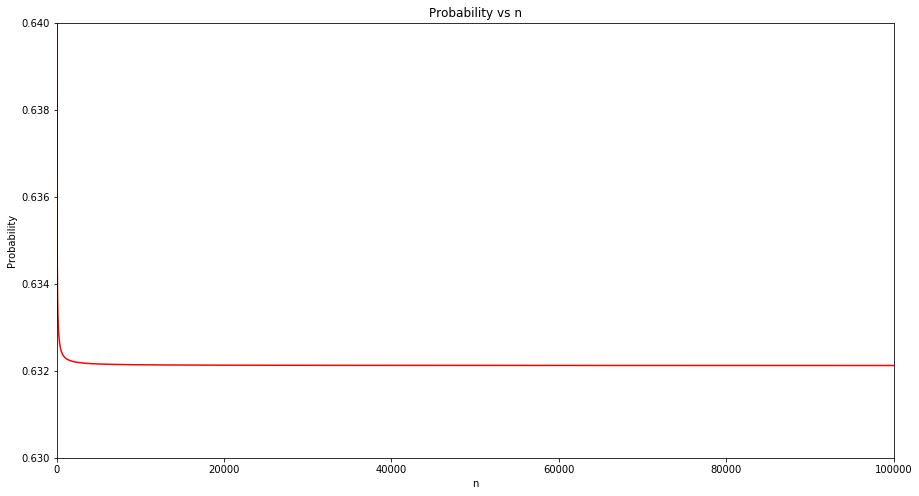

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def compute_probability(n):
    return 1 - (1 - 1/n)**n

n_array = np.arange(1,100001)
prob = {}
for n in n_array:
    prob[n] = compute_probability(n)
    
lists = sorted(prob.items()) 
x, y = zip(*lists)

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111)
plt.plot(x, y, color='r')
ax.set_xlabel('n')
ax.set_ylabel('Probability')
ax.set_title('Probability vs n')
ax.set_xlim(10, 100000)
ax.set_ylim(0.63, 0.64)

plt.show()

Q5. In Chapter 4, we used logistic regression to predict the probability of default using income and balance on the Default data set. We will now estimate the test error of this logistic regression model using the validation set approach. Do not forget to set a random seed before beginning your analysis.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

np.random.seed(1)
default = pd.read_excel("data/Default.xlsx")
default['student'] = default['student'].map({'Yes': 1, 'No': 0})
default['default'] = default['default'].map({'Yes': 1, 'No': 0})

(a) Fit a logistic regression model that uses income and balance to predict default.

In [29]:
from statsmodels.discrete.discrete_model import Logit

X = default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                  0.4594
Time:                        12:36:14   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

(b) Using the validation set approach, estimate the test error of this model.

<b>Sol:</b> The estimated test error rate is <b>2.46%</b>.

In [33]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(default, test_size=0.5)

X = train[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = train['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

X_val = validation[['income', 'balance']]
X_val = sm.add_constant(X_val, prepend=True)
predictions = result.predict(X_val) > 0.5

print("Estimation for test error rate is: " 
      +str((len(validation['default']) - np.sum(predictions == validation['default'])) / (len(validation['default']))))

Optimization terminated successfully.
         Current function value: 0.083176
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                  0.4634
Time:                        12:39:27   Log-Likelihood:                -415.88
converged:                       True   LL-Null:                       -775.08
                                        LLR p-value:                1.001e-156
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5308      0.604    -19.078      0.000     -12.715     -10.346
income      2.357e-05   6.78

(c) Repeat the process in (b) three times, using three different splits of the observations into a training set and a validation set. Comment on the results obtained.

<b>Sol:</b> The estimated test error rate for the three cases are: <b>2.66%, 2.7%</b> and <b>2.8%</b>. It varies a lot along iteration.

In [35]:
for i in range(3):
    train, validation = train_test_split(default, test_size=0.5)

    X = train[['income', 'balance']]
    X = sm.add_constant(X, prepend=True)
    y = train['default']

    model = Logit(y, X)
    result = model.fit()

    X_val = validation[['income', 'balance']]
    X_val = sm.add_constant(X_val, prepend=True)
    predictions = result.predict(X_val) > 0.5

    print("Estimation for test error rate is: " 
      +str((len(validation['default']) - np.sum(predictions == validation['default'])) / (len(validation['default']))))

Optimization terminated successfully.
         Current function value: 0.079463
         Iterations 10
Estimation for test error rate is: 0.0266
Optimization terminated successfully.
         Current function value: 0.081072
         Iterations 10
Estimation for test error rate is: 0.027
Optimization terminated successfully.
         Current function value: 0.073826
         Iterations 10
Estimation for test error rate is: 0.028


(d) Now consider a logistic regression model that predicts the probability of default using income, balance, and a dummy variable for student. Estimate the test error for this model using the validation set approach. Comment on whether or not including a dummy variable for student leads to a reduction in the test error rate.

<b>Sol:</b> Including student in the model does not improve the test erro rate much.

In [38]:
train, validation = train_test_split(default, test_size=0.5)

X = train[['income', 'balance', 'student']]
X = sm.add_constant(X, prepend=True)
y = train['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

X_val = validation[['income', 'balance', 'student']]
X_val = sm.add_constant(X_val, prepend=True)
predictions = result.predict(X_val) > 0.5

print("Estimation for test error rate is: " 
      +str((len(validation['default']) - np.sum(predictions == validation['default'])) / (len(validation['default']))))

Optimization terminated successfully.
         Current function value: 0.070154
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4996
Method:                           MLE   Df Model:                            3
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                  0.4739
Time:                        12:47:51   Log-Likelihood:                -350.77
converged:                       True   LL-Null:                       -666.74
                                        LLR p-value:                1.191e-136
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.3053      0.760    -14.878      0.000     -12.795      -9.816
income     -1.877e-06   1.22

Q6. We continue to consider the use of a logistic regression model to predict the probability of default using income and balance on the Default data set. In particular, we will now compute estimates for the standard errors of the income and balance logistic regression coefficients in two different ways: (1) using the bootstrap, and (2) using the standard formula for computing the standard errors in the glm() function. Do not forget to set a random seed before beginning your analysis.

(a) Using the summary() and glm() functions, determine the estimated standard errors for the coefficients associated with income and balance in a multiple logistic regression model that uses both predictors.

<b>Sol:</b> The standard errors for the coefficients are <b>0.435, 4.99e-06 and 0.000</b> respectively.

In [39]:
from statsmodels.discrete.discrete_model import Logit

X = default[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = default['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                  0.4594
Time:                        13:21:36   Log-Likelihood:                -789.48
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                4.541e-292
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.5405      0.435    -26.544      0.000     -12.393     -10.688
income      2.081e-05   4.99

(b) Write a function, boot.fn(), that takes as input the Default data set as well as an index of the observations, and that outputs the coefficient estimates for income and balance in the multiple logistic regression model.

In [64]:
from sklearn.utils import resample

def boot(df):
    return resample(df)

train = boot(default)
X = train[['income', 'balance']]
X = sm.add_constant(X, prepend=True)
y = train['default']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.076003
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                  0.4672
Time:                        13:34:46   Log-Likelihood:                -760.03
converged:                       True   LL-Null:                       -1426.5
                                        LLR p-value:                3.634e-290
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.8500      0.449    -26.380      0.000     -12.730     -10.970
income      2.468e-05   5.02

(c) Use the boot() function to estimate the standard errors of the logistic regression coefficients for income and balance.

<b>Sol:</b> The standard errors for the coefficients are <b>0.4212, 4.554e-06 and 0.00022</b> respectively.

In [73]:
B = 1000

intercept = []
income = []
balance = []

for i in range(B):
    train = boot(default)
    X = train[['income', 'balance']]
    X = sm.add_constant(X, prepend=True)
    y = train['default']

    model = Logit(y, X)
    result = model.fit(disp=False)
    intercept.append(result.params.const)
    income.append(result.params.income)
    balance.append(result.params.balance)
    
print("SE for intercept: " +str(np.std(intercept, ddof=1)))
print("SE for income: " +str(np.std(income, ddof=1)))
print("SE for balance: " +str(np.std(balance, ddof=1)))

SE for intercept: 0.421160671038164
SE for income: 4.5539698907803916e-06
SE for balance: 0.00022086255501253455


(d) Comment on the estimated standard errors obtained using the glm() function and using your bootstrap function.

<b>Sol:</b> The standard errors obtained using both of the methods are in accordance.

Q7. You will now take this approach in order to compute the LOOCV error for a simple logistic regression model on the Weekly data set.

(a) Fit a logistic regression model that predicts Direction using Lag1 and Lag2.

In [76]:
weekly = pd.read_csv("data/Weekly.csv")
weekly['trend'] = weekly['Direction'].map({'Down': 0, 'Up': 1})

X = weekly[['Lag1', 'Lag2']]
X = sm.add_constant(X, prepend=True)
y = weekly['trend']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.683297
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1086
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                0.005335
Time:                        14:01:38   Log-Likelihood:                -744.11
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.01848
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2212      0.061      3.599      0.000       0.101       0.342
Lag1          -0.0387      0.

(b) Fit a logistic regressionmodel that predicts Direction using Lag1 and Lag2 using all but the first observation.

In [103]:
train = weekly.iloc[1:len(weekly),:]
test = weekly.iloc[0:1, :]

X = train[['Lag1', 'Lag2']]
X = sm.add_constant(X, prepend=True)
y = train['trend']

model = Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.683147
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  trend   No. Observations:                 1088
Model:                          Logit   Df Residuals:                     1085
Method:                           MLE   Df Model:                            2
Date:                Wed, 12 Sep 2018   Pseudo R-squ.:                0.005387
Time:                        14:41:45   Log-Likelihood:                -743.26
converged:                       True   LL-Null:                       -747.29
                                        LLR p-value:                   0.01785
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2232      0.061      3.630      0.000       0.103       0.344
Lag1          -0.0384      0.

(c) Use the model from (b) to predict the direction of the first observation. You can do this by predicting that the first observation will go up if P(Direction="Up"|Lag1, Lag2) > 0.5. Was this observation correctly classified?

<b>Sol:</b> The observation is not correctly classified as the prediction is <b>Up</b> but true trend is <b>Down</b>.

In [125]:
X = test[['Lag1', 'Lag2']]
X = sm.add_constant(X, prepend=True, has_constant='add')
predictions = result.predict(X) > 0.5
print("Prediction: " + str(predictions[0]))

Prediction: True


(d) Write a for loop from i = 1 to i = n, where n is the number of observations in the data set, that performs each of the following steps:

    i. Fit a logistic regression model using all but the ith observation to predict Direction using Lag1 and Lag2.
    ii. Compute the posterior probability of the market moving up for the ith observation.
    iii. Use the posterior probability for the ith observation in order to predict whether or not the market moves up.
    iv. Determine whether or not an error was made in predicting the direction for the ith observation. If an error was made, then indicate this as a 1, and otherwise indicate it as a 0.

In [153]:
n = len(weekly)

error = []
for i in range(n):
    test = weekly.iloc[[i]]
    train = weekly.drop(weekly.index[i])
    
    X = train[['Lag1', 'Lag2']]
    X = sm.add_constant(X, prepend=True)
    y = train['trend']

    model = Logit(y, X)
    result = model.fit(disp=False)
    
    X = test[['Lag1', 'Lag2']]
    X = sm.add_constant(X, prepend=True, has_constant='add')
    predictions = result.predict(X).iloc[0] > 0.5
    error.append(predictions == test['trend'].iloc[0])

(e) Take the average of the n numbers obtained in (d)iv in order to obtain the LOOCV estimate for the test error. Comment on the results.

<b>Sol:</b> The LOOCV estimate for the test error is <b>0.44995</b>.

In [158]:
print("LOOCV estimate for the test error is: " + str((len(error) - sum(error)) / (len(error))))

LOOCV estimate for the test error is: 0.44995408631772266


Q8. We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:
> set .seed (1)
> y=rnorm (100)
> x=rnorm (100)
> y=x-2* x^2+ rnorm (100)

In this data set, what is n and what is p? Write out the model used to generate the data in equation form.

<b>Sol:</b> In this data set, $n=100$ and $p=2$. The model used is:

$$Y = X - 2X^2 + \epsilon$$

In [174]:
np.random.seed(1)
x = np.random.normal(loc=0, scale=1, size=100)
y = x - 2*(x**2) + np.random.normal(loc=0, scale=1, size=100)

(b) Create a scatterplot of X against Y . Comment on what you find.

<b>Sol:</b> The scatterplot suggests a quadratic relationship.

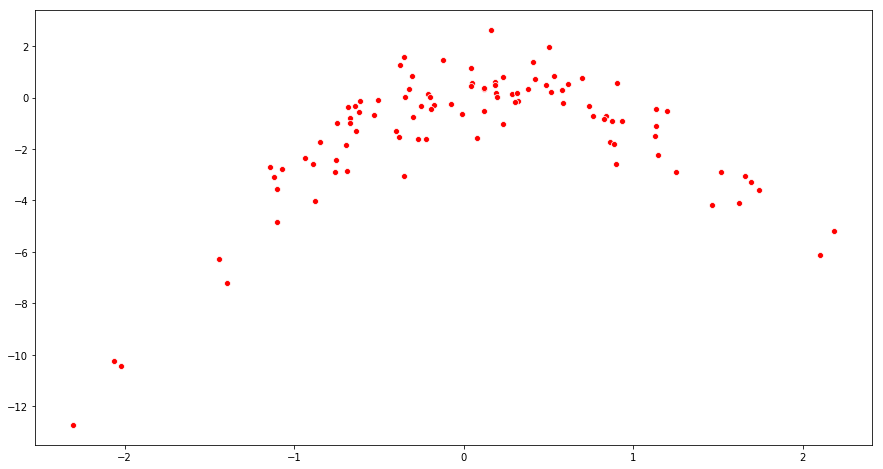

In [175]:
fig = plt.figure(figsize=(15, 8))
sns.scatterplot(x=x, y=y, color='r')

(c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:

    i. Y = β0 + β1X + e
    ii. Y = β0 + β1X + β2X2 + e
    iii. Y = β0 + β1X + β2X2 + β3X3 + e
    iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + e
    
<b>Sol:</b> Instead models upto 7th power of X has been fitted. The model with 4 parameters has the lowest LOOCV error.

In [224]:
import random
from sklearn.linear_model import LinearRegression

def LOOCV(df):
    n = len(df)
    error = 0.0

    for i in range(n):
        test = df.iloc[[i]]
        train = df.drop(df.index[i])
    
        X_ = train.loc[:, train.columns != 'y']
        y_ = train['y']
    
        model = LinearRegression(fit_intercept=True)
        model.fit (X_, y_)
    
        X_ = test.loc[:, df.columns != 'y']
        predictions = model.predict(X_)
        error += (predictions - test.iloc[0]['y'])**2
        
    return (error/n)

random.seed(1)
# Model 1
df = pd.DataFrame({'x':x, 'y':y})
print("MSE for model 1: " +str(LOOCV(df)))

# Model 1
df = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("MSE for model 2: " +str(LOOCV(df)))

# Model 3
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("MSE for model 3: " +str(LOOCV(df)))

# Model 4
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("MSE for model 4: " +str(LOOCV(df)))

# Model 5
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'y':y})
print("MSE for model 5: " +str(LOOCV(df)))

# Model 6
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'y':y})
print("MSE for model 6: " +str(LOOCV(df)))

# Model 7
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'x7':x**7, 'y':y})
print("MSE for model 7: " +str(LOOCV(df)))

MSE for model 1: [6.26076433]
MSE for model 2: [0.91428971]
MSE for model 3: [0.92687688]
MSE for model 4: [0.86691169]
MSE for model 5: [0.88748397]
MSE for model 6: [0.95120753]
MSE for model 7: [1.71904764]


(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

<b>Sol:</b> The results are identical.

In [213]:
random.seed(5)
# Model 1
df = pd.DataFrame({'x':x, 'y':y})
print("MSE for model 1: " +str(LOOCV(df)))

# Model 1
df = pd.DataFrame({'x':x, 'x2':x**2, 'y':y})
print("MSE for model 2: " +str(LOOCV(df)))

# Model 3
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'y':y})
print("MSE for model 3: " +str(LOOCV(df)))

# Model 4
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})
print("MSE for model 4: " +str(LOOCV(df)))

# Model 5
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'y':y})
print("MSE for model 5: " +str(LOOCV(df)))

# Model 6
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'y':y})
print("MSE for model 6: " +str(LOOCV(df)))

# Model 7
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'x5':x**5, 'x6':x**6, 'x7':x**7, 'y':y})
print("MSE for model 7: " +str(LOOCV(df)))

MSE for model 1: [6.26076433]
MSE for model 2: [0.91428971]
MSE for model 3: [0.92687688]
MSE for model 4: [0.86691169]
MSE for model 5: [0.88748397]
MSE for model 6: [0.95120753]
MSE for model 7: [1.71904764]


(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

<b>Sol:</b> The 4th model (the one with 4 parameters) has the lowest LOOCV error. This is not expected as the relationship between X and Y is quadratic.

(f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

<b>Sol:</b> From the test of statistical significance for the model (with 4 parameters), it is observed that the cubic term is not statistically significant.

In [227]:
df = pd.DataFrame({'x':x, 'x2':x**2, 'x3':x**3, 'x4':x**4, 'y':y})

X_ = df.loc[:, df.columns != 'y']
X_ = sm.add_constant(X_, prepend=True)
y_ = df['y']

model = sm.OLS(y_, X_)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     163.0
Date:                Wed, 12 Sep 2018   Prob (F-statistic):           1.24e-41
Time:                        19:10:57   Log-Likelihood:                -130.63
No. Observations:                 100   AIC:                             271.3
Df Residuals:                      95   BIC:                             284.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3140      0.136      2.311      0.0

Q9. We will now consider the Boston housing data set, from the MASS library.

(a) Based on this data set, provide an estimate for the population mean of medv. Call this estimate $\widehat{\mu}$.

<b>Sol:</b> Estimate for the population mean of medv is <b>22.5328</b>.

In [229]:
boston = pd.read_csv("data/Boston.csv")
print("Estimate for population mean of medv is: " +str(boston['medv'].mean()))

Estimate for population mean of medv is: 22.532806324110677


(b) Provide an estimate of the standard error of $\widehat{\mu}$. Interpret this result.

Hint: We can compute the standard error of the sample mean by dividing the sample standard deviation by the square root of the number of observations.

In [231]:
import math

print("Estimate of standard error of sample mean of medv is: " +str(boston['medv'].std() / math.sqrt(len(boston))))

Estimate of standard error of sample mean of medv is: 0.40886114749753505


(c) Now estimate the standard error of $\widehat{\mu}$ using the bootstrap. How does this compare to your answer from (b)?

<b>Sol:</b> The estimate using bootstrap is <b>0.40932</b>, which is quite close to the estimate in (b).

In [236]:
def boot(df):
    return resample(df)

B = 1000
sample_mean = []

for i in range(B):
    df = boot(boston)
    sample_mean.append(df['medv'].mean())
    
print("Estimate of standard error of sample mean of medv (using bootstrap) is: " +str(np.std(sample_mean, ddof=1)))

Estimate of standard error of sample mean of medv (using bootstrap) is: 0.4093238681867342


(d) Based on your bootstrap estimate from (c), provide a 95% confidence interval for the mean of medv. Compare it to the results obtained using t.test(Boston$medv).

<b>Sol:</b> The 95% confidence interval calculated from bootstrap is <b>(22.12348,22.94212)</b>. The p-value for t-test of the mean of medv for the equality with 0 is approximately equal to 0, which is in accordance with the results.

In [241]:
import scipy.stats as stats

print("95% Confidence interval using bootstrap is: (" + str(22.5328 - 0.40932) + "," + str(22.5328 + 0.40932) + ")")
stats.ttest_1samp(a= boston['medv'], popmean=0)

95% Confidence interval using bootstrap is: (22.12348,22.942120000000003)


Ttest_1sampResult(statistic=55.11114583037392, pvalue=9.370623727132662e-216)

(e) Based on this data set, provide an estimate, $\widehat{\mu_{med}}$, for the median value of medv in the population.

<b>Sol:</b> Estimate for the population median of medv is <b>21.2</b>.

In [243]:
print("Estimate for population median of medv is: " +str(boston['medv'].median()))

Estimate for population median of medv is: 21.2


(f) We now would like to estimate the standard error of $\widehat{\mu_{med}}$. Unfortunately, there is no simple formula for computing the standard error of the median. Instead, estimate the standard error of the median using the bootstrap. Comment on your findings.

<b>Sol:</b> The estimate of the standard error of median using bootstrap is <b>0.378564</b>.

In [250]:
B = 1000
sample_median = []

for i in range(B):
    df = boot(boston)
    sample_median.append(df['medv'].median())
    
print("Estimate of standard error of sample median of medv (using bootstrap) is: " +str(np.std(sample_median, ddof=1)))

Estimate of standard error of sample median of medv (using bootstrap) is: 0.36913325081446763


(g) Based on this data set, provide an estimate for the tenth percentile of medv in Boston suburbs. Call this quantity $\widehat{\mu_{0.1}}$. (You can use the quantile() function.)

<b>Sol:</b> Estimate for the 10th percentile of medv is <b>12.75</b>.

In [252]:
print("Estimate for the tenth percentile of medv is: " +str(boston['medv'].quantile(q=0.1)))

Estimate for the tenth percentile of medv is: 12.75


(h) Use the bootstrap to estimate the standard error of $\widehat{\mu_{0.1}}$. Comment on your findings.

<b>Sol:</b> The estimate of the standard error of median using bootstrap is <b>0.49295</b>.

In [255]:
B = 1000
sample_percentile = []

for i in range(B):
    df = boot(boston)
    sample_percentile.append(df['medv'].quantile(q=0.1))
    
print("Estimate of standard error for the tenth percentile of medv (using bootstrap) is: " 
      +str(np.std(sample_percentile, ddof=1)))

Estimate of standard error for the tenth percentile of medv (using bootstrap) is: 0.5069736998428344
